# Linear Least Square Fitting
## Importing Libraries

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable as ptbl
import math

In [121]:
y = np.array([200,100,50,30,20,10])
x = np.array([1,1.7,2.89,4.8,5.88,10])

In [122]:
n = len(x)
X = np.zeros(n)
Y = np.zeros(n)
for i in range(n):
        X[i] = math.log10(x[i])
        Y[i] = math.log10(y[i])

In [123]:
print(X)
print(Y)

[0.         0.23044892 0.46089784 0.68124124 0.76937733 1.        ]
[2.30103    2.         1.69897    1.47712125 1.30103    1.        ]


In [124]:
print(sum(X))
print(sum(X**2))

3.1419653275865476
2.3215646202031395


In [125]:
print(sum(X*Y))
print(sum(Y))

4.251208343190909
9.778151250383644


## Function for Linear Least Square Fitting
## PV^n = C

In [126]:
def linearfitting(x,y):
    n = len(x)
    x_sq_sum = sum(x**2)
    x_sum = sum(x)
    yx_sum = sum(x*y)
    y_sum = sum(y)

    A = np.array([
        [n,x_sum],
        [x_sum,x_sq_sum]
        ])

    b = np.array([
        [y_sum],
        [yx_sum]
        ])

    invA = np.linalg.inv(A)
    M = np.matmul(invA,b)
    print(A,"\n\n",b)
    return M

## Calling Linear Least Square fitting function on given database

In [127]:
M = linearfitting(X,Y)
b = M[0][0]
m = M[1][0]

[[6.         3.14196533]
 [3.14196533 2.32156462]] 

 [[9.77815125]
 [4.25120834]]


## Visualizing Calculated Coefficient and constant

In [128]:
print("m = ",m,"\tb = ",b)

m =  -1.2853819351526221 	b =  2.302796120556546


## Calculating Approximate Values

In [129]:
y_pred = m*X + b

## Table of actual values and predicted values

In [130]:
table = ptbl(['X','y','y-predicted'])
for i in range(len(X)):
    table.add_row([X[i],Y[i],y_pred[i]])
print(table)

+--------------------+--------------------+--------------------+
|         X          |         y          |    y-predicted     |
+--------------------+--------------------+--------------------+
|        0.0         | 2.3010299956639813 | 2.302796120556546  |
| 0.2304489213782739 |        2.0         | 2.0065812400415055 |
| 0.4608978427565479 | 1.6989700043360187 | 1.7103663595264655 |
| 0.6812412373755872 | 1.4771212547196624 | 1.427140940552947  |
| 0.7693773260761385 | 1.3010299956639813 | 1.313852404302249  |
|        1.0         |        1.0         | 1.0174141854039238 |
+--------------------+--------------------+--------------------+


## Visualizing Best Fit Line

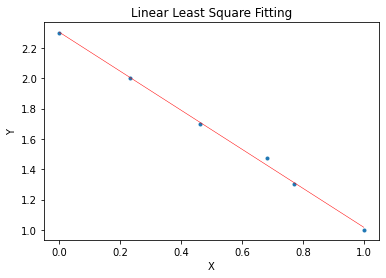

In [131]:
plt.scatter(X,Y, marker = '.')
plt.plot(X,y_pred,color = 'red',linewidth = 0.5)
plt.title('Linear Least Square Fitting')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Evaluating Error in reconstruction

In [132]:
max_error = max(abs(y-y_pred)/y)
print(max_error)

0.9884860193972174
